# Inaugural Project - Codenomics Crew

Imports and set magics:

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Setup
We consider the economy descriped in the 'InauguralProject2024.pdf' file.  
We will not be restating the equations, but they can be found along with our solutions.

# Question 1

We are told, that the initial endowment is:
$$\omega_1^A=0.8$$
$$\omega_2^A=0.3$$

Illustrating the set (i.e. all the Pareto improvements relative to the endowment) in the Edgeworth box

In [31]:
from inauguralproject import ExchangeEconomyClass
model = ExchangeEconomyClass()
par = model.par

N = 75
x_grid = np.linspace(0,1,N+1)



# Calculate initial utilities:
u_A_initial = model.utility_A(par.w1A, par.w2A)
u_B_initial = model.utility_B(par.w1B, par.w2B)

pareto_improvement = [] #Initialise empty list to store pareto improvements

# Iterate through redistributions
for x1A in x_grid:
    for x2A in x_grid:

        # Ensure total endowment of each good is 1
        x1B = 1 - x1A
        x2B = 1 - x2A

        # Calculate utilities
        u_A = x1A**par.alpha * x2A**(1-par.alpha)
        u_B = x1B**par.beta * x2B**(1-par.beta)

        # Check for Pareto improvement
        if u_A > u_A_initial and u_B > u_B_initial:
            pareto_improvement.append((np.array([x1A, x2A]), np.array([x1B, x2B])))

# for allocation in pareto_improvement:
#    print("Consumer A's allocation:",allocation[0], "| Consumer B's allocation:", allocation[1])

In [32]:
# par = model.par

# # a. total endowment
# w1bar = 1.0
# w2bar = 1.0

# # b. figure set up
# fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
# ax_A = fig.add_subplot(1, 1, 1)

# ax_A.set_xlabel("$x_1^A$")
# ax_A.set_ylabel("$x_2^A$")

# temp = ax_A.twinx()
# temp.set_ylabel("$x_2^B$")
# ax_B = temp.twiny()
# ax_B.set_xlabel("$x_1^B$")
# ax_B.invert_xaxis()
# ax_B.invert_yaxis()


# ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
# for allocation in pareto_improvement:
#     ax_A.scatter(allocation[0][0], allocation[0][1], marker='o', color='red')
#     ax_B.scatter(allocation[1][0], allocation[1][1], marker='o', color='red')

# # limits
# ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
# ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
# ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
# ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

# ax_A.set_xlim([-0.1, w1bar + 0.1])
# ax_A.set_ylim([-0.1, w2bar + 0.1])    
# ax_B.set_xlim([w1bar + 0.1, -0.1])
# ax_B.set_ylim([w2bar + 0.1, -0.1])

# ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 2

Calculating the error in the market clearing conditions

In [33]:
par = model.par
P1 = np.linspace(0.5,2.5,N+1)

eps1 = []
eps2 = []
p_1 = []

for p1 in P1:   
#Loops through every price and calculates demand for each consumer and the error

    demandA1, demandA2 = model.demand_A(p1)     #Calculates demand for good 1 and good 2 for consumer A
    demandB1, demandB2 = model.demand_B(p1)     #Calculates demand for good 1 and good 2 for consumer B

    eps1.append(demandA1-par.w1A+demandB1-par.w1B)   #Adds the error to the list "eps1"
    eps2.append(demandA2-par.w2A+demandB2-par.w2B)   #Adds the error to the list "eps2"
    p_1.append(p1)                                               #Stores the price used for calculating the two errors

    
for price, error1, error2 in zip(p_1, eps1, eps2):
    sign1 = '+' if error1 >= 0 else '-'  # Determine sign for error1
    sign2 = '+' if error2 >= 0 else '-'  # Determine sign for error2
    
    print(f"For price = {price:.2f} ---> epsilon1 = {sign1}{abs(error1):.4f}\t and epsilon2 = {sign2}{abs(error2):.4f}")


For price = 0.50 ---> epsilon1 = +0.5333	 and epsilon2 = -0.2667
For price = 0.53 ---> epsilon1 = +0.4759	 and epsilon2 = -0.2507
For price = 0.55 ---> epsilon1 = +0.4241	 and epsilon2 = -0.2347
For price = 0.58 ---> epsilon1 = +0.3770	 and epsilon2 = -0.2187
For price = 0.61 ---> epsilon1 = +0.3341	 and epsilon2 = -0.2027
For price = 0.63 ---> epsilon1 = +0.2947	 and epsilon2 = -0.1867
For price = 0.66 ---> epsilon1 = +0.2586	 and epsilon2 = -0.1707
For price = 0.69 ---> epsilon1 = +0.2252	 and epsilon2 = -0.1547
For price = 0.71 ---> epsilon1 = +0.1944	 and epsilon2 = -0.1387
For price = 0.74 ---> epsilon1 = +0.1658	 and epsilon2 = -0.1227
For price = 0.77 ---> epsilon1 = +0.1391	 and epsilon2 = -0.1067
For price = 0.79 ---> epsilon1 = +0.1143	 and epsilon2 = -0.0907
For price = 0.82 ---> epsilon1 = +0.0911	 and epsilon2 = -0.0747
For price = 0.85 ---> epsilon1 = +0.0693	 and epsilon2 = -0.0587
For price = 0.87 ---> epsilon1 = +0.0489	 and epsilon2 = -0.0427
For price = 0.90 ---> eps

Below the errors are plotted as functions of the price

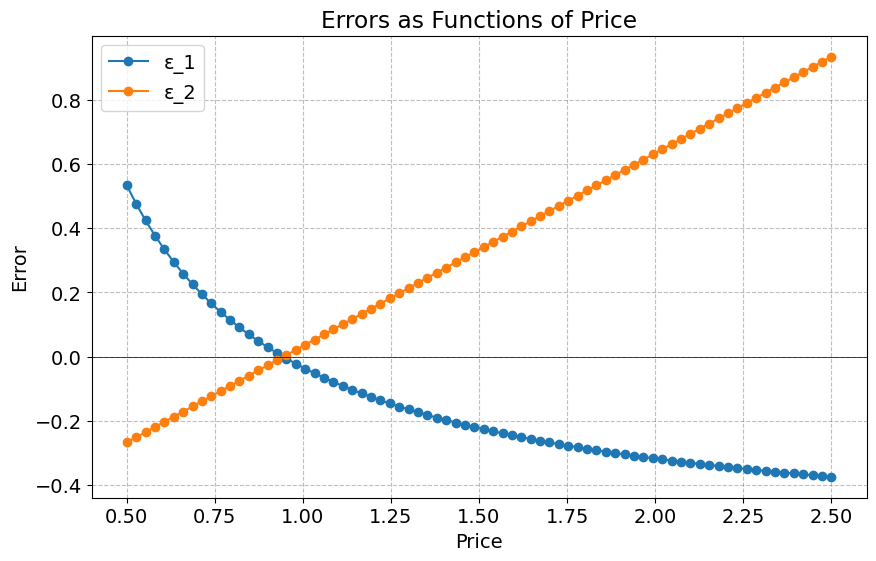

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(p_1, eps1, label='ε_1', marker='o')
plt.plot(p_1, eps2, label='ε_2', marker='o')
plt.xlabel('Price')
plt.ylabel('Error')
plt.title('Errors as Functions of Price')
plt.axhline(0, color='black', linewidth=0.5)  # Adding horizontal line at y=0
plt.legend()
plt.grid(True)
plt.show()

# Question 3

Finding the market clearing price.  
Because of Walras' law, we only need to focus on clearing in the market of good 1.

In [35]:
p1_guess = 1.5
p2 = 1
model.find_equilibrium(p1_guess,p2)

  0: p1 =   1.00000000 -> excess demand ->    -0.03333333
  1: p1 =   0.99833333 -> excess demand ->    -0.03238731
  2: p1 =   0.99671397 -> excess demand ->    -0.03146511
  3: p1 =   0.99514071 -> excess demand ->    -0.03056629
  4: p1 =   0.99361240 -> excess demand ->    -0.02969042
   ...
 25: p1 =   0.97005748 -> excess demand ->    -0.01584217
 50: p1 =   0.95604916 -> excess demand ->    -0.00728292
 75: p1 =   0.94965869 -> excess demand ->    -0.00329439
100: p1 =   0.94677835 -> excess demand ->    -0.00147906
125: p1 =   0.94548729 -> excess demand ->    -0.00066178
150: p1 =   0.94491005 -> excess demand ->    -0.00029565
175: p1 =   0.94465225 -> excess demand ->    -0.00013199
200: p1 =   0.94453718 -> excess demand ->    -0.00005891
225: p1 =   0.94448582 -> excess demand ->    -0.00002629
250: p1 =   0.94446291 -> excess demand ->    -0.00001173
275: p1 =   0.94445268 -> excess demand ->    -0.00000523
300: p1 =   0.94444812 -> excess demand ->    -0.00000234
325: p1

In [36]:
model.print_solution()

Solution to market equilibrium:
p1 = 0.944444460153369

Excess demands are:
Z1 = -9.979787329861267e-09
Z2 = 9.425354940972852e-09


# Question 4

We now assume that consumer A will chose a price that maximizes her own utility.

In [37]:
# 4.a: Consumer A now chooses a price in P1

# Define the number of price points
N = 75
prices = np.linspace(0.5, 2.5, N+1)

# Initialize variables to store maximum utility and corresponding price
max_utility = -np.inf
optimal_price = np.nan

for price in prices:
    # Initialize the ExchangeEconomyClass instance
    model = ExchangeEconomyClass()

    price1 = 0.5
    u_A_i = model.utility_A(1-model.demand_B(price1)[0], 1-model.demand_B(price1)[1])

    u_A = model.utility_A(1-model.demand_B(price)[0], 1-model.demand_B(price)[1])

    if u_A > u_A_i :
        u_A_i = u_A
        optimal_price = price
    
print(u_A_i)
print(optimal_price)





0.6255621608753067
2.5


C:\Users\rasmu\AppData\Local\Temp\ipykernel_10420\3734447456.py:20: RuntimeWarning: invalid value encountered in greater
  if u_A > u_A_i :


In [38]:
# 4.b: Now consumer A can choose ALL positive values

# Define the number of price points
N = 75
prices = np.linspace(0.5, 2.5, N+1)

# Initialize variables to store maximum utility and corresponding price
max_utility = -np.inf
optimal_price = None

# Iterate over each price
for price in prices:
    # Initialize the ExchangeEconomyClass instance
    model = ExchangeEconomyClass()
    
    # Find equilibrium for the current price
    model.find_equilibrium(p2=1, p1_guess=price)
    
    # Calculate utility for consumer A at equilibrium
    x1A, x2A = model.demand_A(model.p1_star)
    utility_A = model.utility_A(x1A, x2A)
    
    # Check if this price yields higher utility
    if utility_A > max_utility:
        max_utility = utility_A
        optimal_price = model.p1_star

# Print the optimal price and utility
print("Optimal Price:", optimal_price)
print("Maximum Utility of Consumer A:", max_utility)

  0: p1 =   0.50000000 -> excess demand ->     0.53333333
  1: p1 =   0.52666667 -> excess demand ->     0.47594937
  2: p1 =   0.55046414 -> excess demand ->     0.42943431
  3: p1 =   0.57193585 -> excess demand ->     0.39078711
  4: p1 =   0.59147521 -> excess demand ->     0.35805650
   ...
 25: p1 =   0.80235679 -> excess demand ->     0.10625272
 50: p1 =   0.88663868 -> excess demand ->     0.03911792
 75: p1 =   0.91956479 -> excess demand ->     0.01623354
100: p1 =   0.93351139 -> excess demand ->     0.00702705
125: p1 =   0.93959856 -> excess demand ->     0.00309444
150: p1 =   0.94228860 -> excess demand ->     0.00137273
175: p1 =   0.94348378 -> excess demand ->     0.00061093
200: p1 =   0.94401605 -> excess demand ->     0.00027228
225: p1 =   0.94425335 -> excess demand ->     0.00012143
250: p1 =   0.94435919 -> excess demand ->     0.00005417
275: p1 =   0.94440641 -> excess demand ->     0.00002417
300: p1 =   0.94442747 -> excess demand ->     0.00001078
325: p1

225: p1 =   0.94493509 -> excess demand ->    -0.00031154
250: p1 =   0.94466343 -> excess demand ->    -0.00013909
275: p1 =   0.94454217 -> excess demand ->    -0.00006208
300: p1 =   0.94448805 -> excess demand ->    -0.00002770
325: p1 =   0.94446390 -> excess demand ->    -0.00001236
350: p1 =   0.94445313 -> excess demand ->    -0.00000552
375: p1 =   0.94444832 -> excess demand ->    -0.00000246
400: p1 =   0.94444617 -> excess demand ->    -0.00000110
425: p1 =   0.94444522 -> excess demand ->    -0.00000049
450: p1 =   0.94444479 -> excess demand ->    -0.00000022
475: p1 =   0.94444460 -> excess demand ->    -0.00000010
500: p1 =   0.94444451 -> excess demand ->    -0.00000004
525: p1 =   0.94444448 -> excess demand ->    -0.00000002
546: p1 =   0.94444446 -> excess demand ->    -0.00000001
  0: p1 =   1.40666667 -> excess demand ->    -0.19715640
  1: p1 =   1.39680885 -> excess demand ->    -0.19431338
  2: p1 =   1.38709318 -> excess demand ->    -0.19147181
  3: p1 =   1.